<a href="https://colab.research.google.com/github/tubagusibrohim/Exasens-Data-Set-Clustering/blob/main/Exasens_Dataset_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libaries

In [2]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
 
# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')
sns.set(rc={'figure.facecolor':'white'})
sns.set_palette('Accent')

# Data Pre-Processing

Before we can begin to create our first model we first need to load and pre-process. This step ensure that our model will receive a good data to learn from, as they said "a model is only as good as it's data". The data pre-processing will be divided into few steps as explained below.

In [3]:
# Load dataset and drop the CustomerID column
df_exa = (pd.read_csv('https://raw.githubusercontent.com/tubagusibrohim/Exasens-Data-Set-Clustering/main/Exasens.csv')
             .drop('ID', axis=1))
 
 
print('Shape of dataframe:', df_exa.shape)
df_exa.head()

Shape of dataframe: (399, 8)


,Diagnosis,MinIP,AvgIP,MinRP,AvgRP,Gender,Age,Smoking
0,COPD,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,COPD,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,COPD,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,COPD,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,COPD,-325.39,-316.155785,-478.52,-472.869783,0,65,2


## Missing Values

To start we need to check if there is any missing values in our data. In some case our data might have missing values in some column, this can be caused some reasons such as human error. We can use the `is_null()` function from Pandas to check for any missing data and then use the `sum()` function to see the total of missing values in each column.

In [4]:
df_exa.isnull().sum()

Diagnosis      0
MinIP        299
AvgIP        299
MinRP        299
AvgRP        299
Gender         0
Age            0
Smoking        0
dtype: int64

Karena terdapat missing value maka akan dilakukan proses **Imputasi**

In [5]:
df_exa_ready = df_exa.copy()
print('mean dari MinIP:',df_exa_ready['MinIP'].mean())
df_exa_ready['MinIP_imputed_mean'] = df_exa_ready['MinIP'].replace(np.nan, df_exa_ready['MinIP'].mean())
df_exa_ready[['MinIP','MinIP_imputed_mean']].head(10)

mean dari MinIP: -314.9418


,MinIP,MinIP_imputed_mean
0,-320.61,-320.6100
1,-325.39,-325.3900
2,-323.00,-323.0000
3,-327.78,-327.7800
4,-325.39,-325.3900
5,-327.78,-327.7800
6,-330.18,-330.1800
7,NaN,-314.9418
8,-320.61,-320.6100
9,-315.82,-315.8200


In [6]:
print('mean dari AvgIP:',df_exa_ready['AvgIP'].mean())
df_exa_ready['AvgIP_imputed_mean'] = df_exa_ready['AvgIP'].replace(np.nan, df_exa_ready['AvgIP'].mean())
df_exa_ready[['AvgIP','AvgIP_imputed_mean']].head(10)

mean dari AvgIP: -304.779676745


,AvgIP,AvgIP_imputed_mean
0,-300.563531,-300.563531
1,-314.750360,-314.750360
2,-317.436056,-317.436056
3,-317.399670,-317.399670
4,-316.155785,-316.155785
5,-318.677553,-318.677553
6,-320.617478,-320.617478
7,NaN,-304.779677
8,-307.599586,-307.599586
9,-300.104765,-300.104765


In [7]:
print('mean dari MinRP:',df_exa_ready['MinRP'].mean())
df_exa_ready['MinRP_imputed_mean'] = df_exa_ready['MinRP'].replace(np.nan, df_exa_ready['MinRP'].mean())
df_exa_ready[['MinRP','MinRP_imputed_mean']].head(10)

mean dari MinRP: -473.00220000000036


,MinRP,MinRP_imputed_mean
0,-495.26,-495.2600
1,-473.73,-473.7300
2,-476.12,-476.1200
3,-473.73,-473.7300
4,-478.52,-478.5200
5,-507.23,-507.2300
6,-473.73,-473.7300
7,NaN,-473.0022
8,-476.12,-476.1200
9,-473.73,-473.7300


In [8]:
print('mean dari AvgRP:',df_exa_ready['AvgRP'].mean())
df_exa_ready['AvgRP_imputed_mean'] = df_exa_ready['AvgRP'].replace(np.nan, df_exa_ready['AvgRP'].mean())
df_exa_ready[['AvgRP','AvgRP_imputed_mean']].head(10)

mean dari AvgRP: -458.70166630299997


,AvgRP,AvgRP_imputed_mean
0,-464.171991,-464.171991
1,-469.263140,-469.263140
2,-471.897667,-471.897667
3,-468.856388,-468.856388
4,-472.869783,-472.869783
5,-469.024194,-469.024194
6,-467.361854,-467.361854
7,NaN,-458.701666
8,-470.181633,-470.181633
9,-466.378634,-466.378634


In [9]:
df_exa_ready['MinIP'] = df_exa_ready['MinIP_imputed_mean']
df_exa_ready['AvgIP'] = df_exa_ready['AvgIP_imputed_mean']
df_exa_ready['MinRP'] = df_exa_ready['MinRP_imputed_mean']
df_exa_ready['AvgRP'] = df_exa_ready['AvgRP_imputed_mean']

In [10]:
df_exa_ready.drop(['MinIP_imputed_mean','AvgIP_imputed_mean','MinRP_imputed_mean','AvgRP_imputed_mean'],axis=1, inplace = True)

In [11]:
df_exa_ready.isnull().sum()

Diagnosis    0
MinIP        0
AvgIP        0
MinRP        0
AvgRP        0
Gender       0
Age          0
Smoking      0
dtype: int64

## Scale Numeric Data


In [12]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
num_cols = ['Gender', 'Age','Smoking']
df_exa_ready[num_cols] = scaler.fit_transform(df_exa_ready[num_cols])

df_exa_ready.head()

,Diagnosis,MinIP,AvgIP,MinRP,AvgRP,Gender,Age,Smoking
0,COPD,-320.61,-300.563531,-495.26,-464.171991,1.228590,1.524140,0.368550
1,COPD,-325.39,-314.750360,-473.73,-469.263140,-0.813941,1.254506,0.368550
2,COPD,-323.00,-317.436056,-476.12,-471.897667,1.228590,1.308433,1.717648
3,COPD,-327.78,-317.399670,-473.73,-468.856388,1.228590,1.470213,0.368550
4,COPD,-325.39,-316.155785,-478.52,-472.869783,-0.813941,0.877019,0.368550


## Encode Categorical Value




In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ['Diagnosis']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_exa_ready[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
df_exa_ready = df_exa_ready.drop(cat_cols ,axis=1)
df_exa_ready = pd.concat([df_encoded, df_exa_ready], axis=1)

print('Shape of dataframe:', df_exa_ready.shape)
df_exa_ready.head()

Shape of dataframe: (399, 11)


,Diagnosis_Asthma,Diagnosis_COPD,Diagnosis_HC,Diagnosis_Infected,MinIP,AvgIP,MinRP,AvgRP,Gender,Age,Smoking
0,0.0,1.0,0.0,0.0,-320.61,-300.563531,-495.26,-464.171991,1.228590,1.524140,0.368550
1,0.0,1.0,0.0,0.0,-325.39,-314.750360,-473.73,-469.263140,-0.813941,1.254506,0.368550
2,0.0,1.0,0.0,0.0,-323.00,-317.436056,-476.12,-471.897667,1.228590,1.308433,1.717648
3,0.0,1.0,0.0,0.0,-327.78,-317.399670,-473.73,-468.856388,1.228590,1.470213,0.368550
4,0.0,1.0,0.0,0.0,-325.39,-316.155785,-478.52,-472.869783,-0.813941,0.877019,0.368550


## Data Exploration

Before starting to build our model it's a good practice to always do initial data exploration. It will help us understand our data better and can help us decide which feature to use when building our model. Here, we will try to see the relationship between each column in the data by using the `pairplot()` function from Seaborn to draw a histogram and scatter plot of every combination between all the column we have.

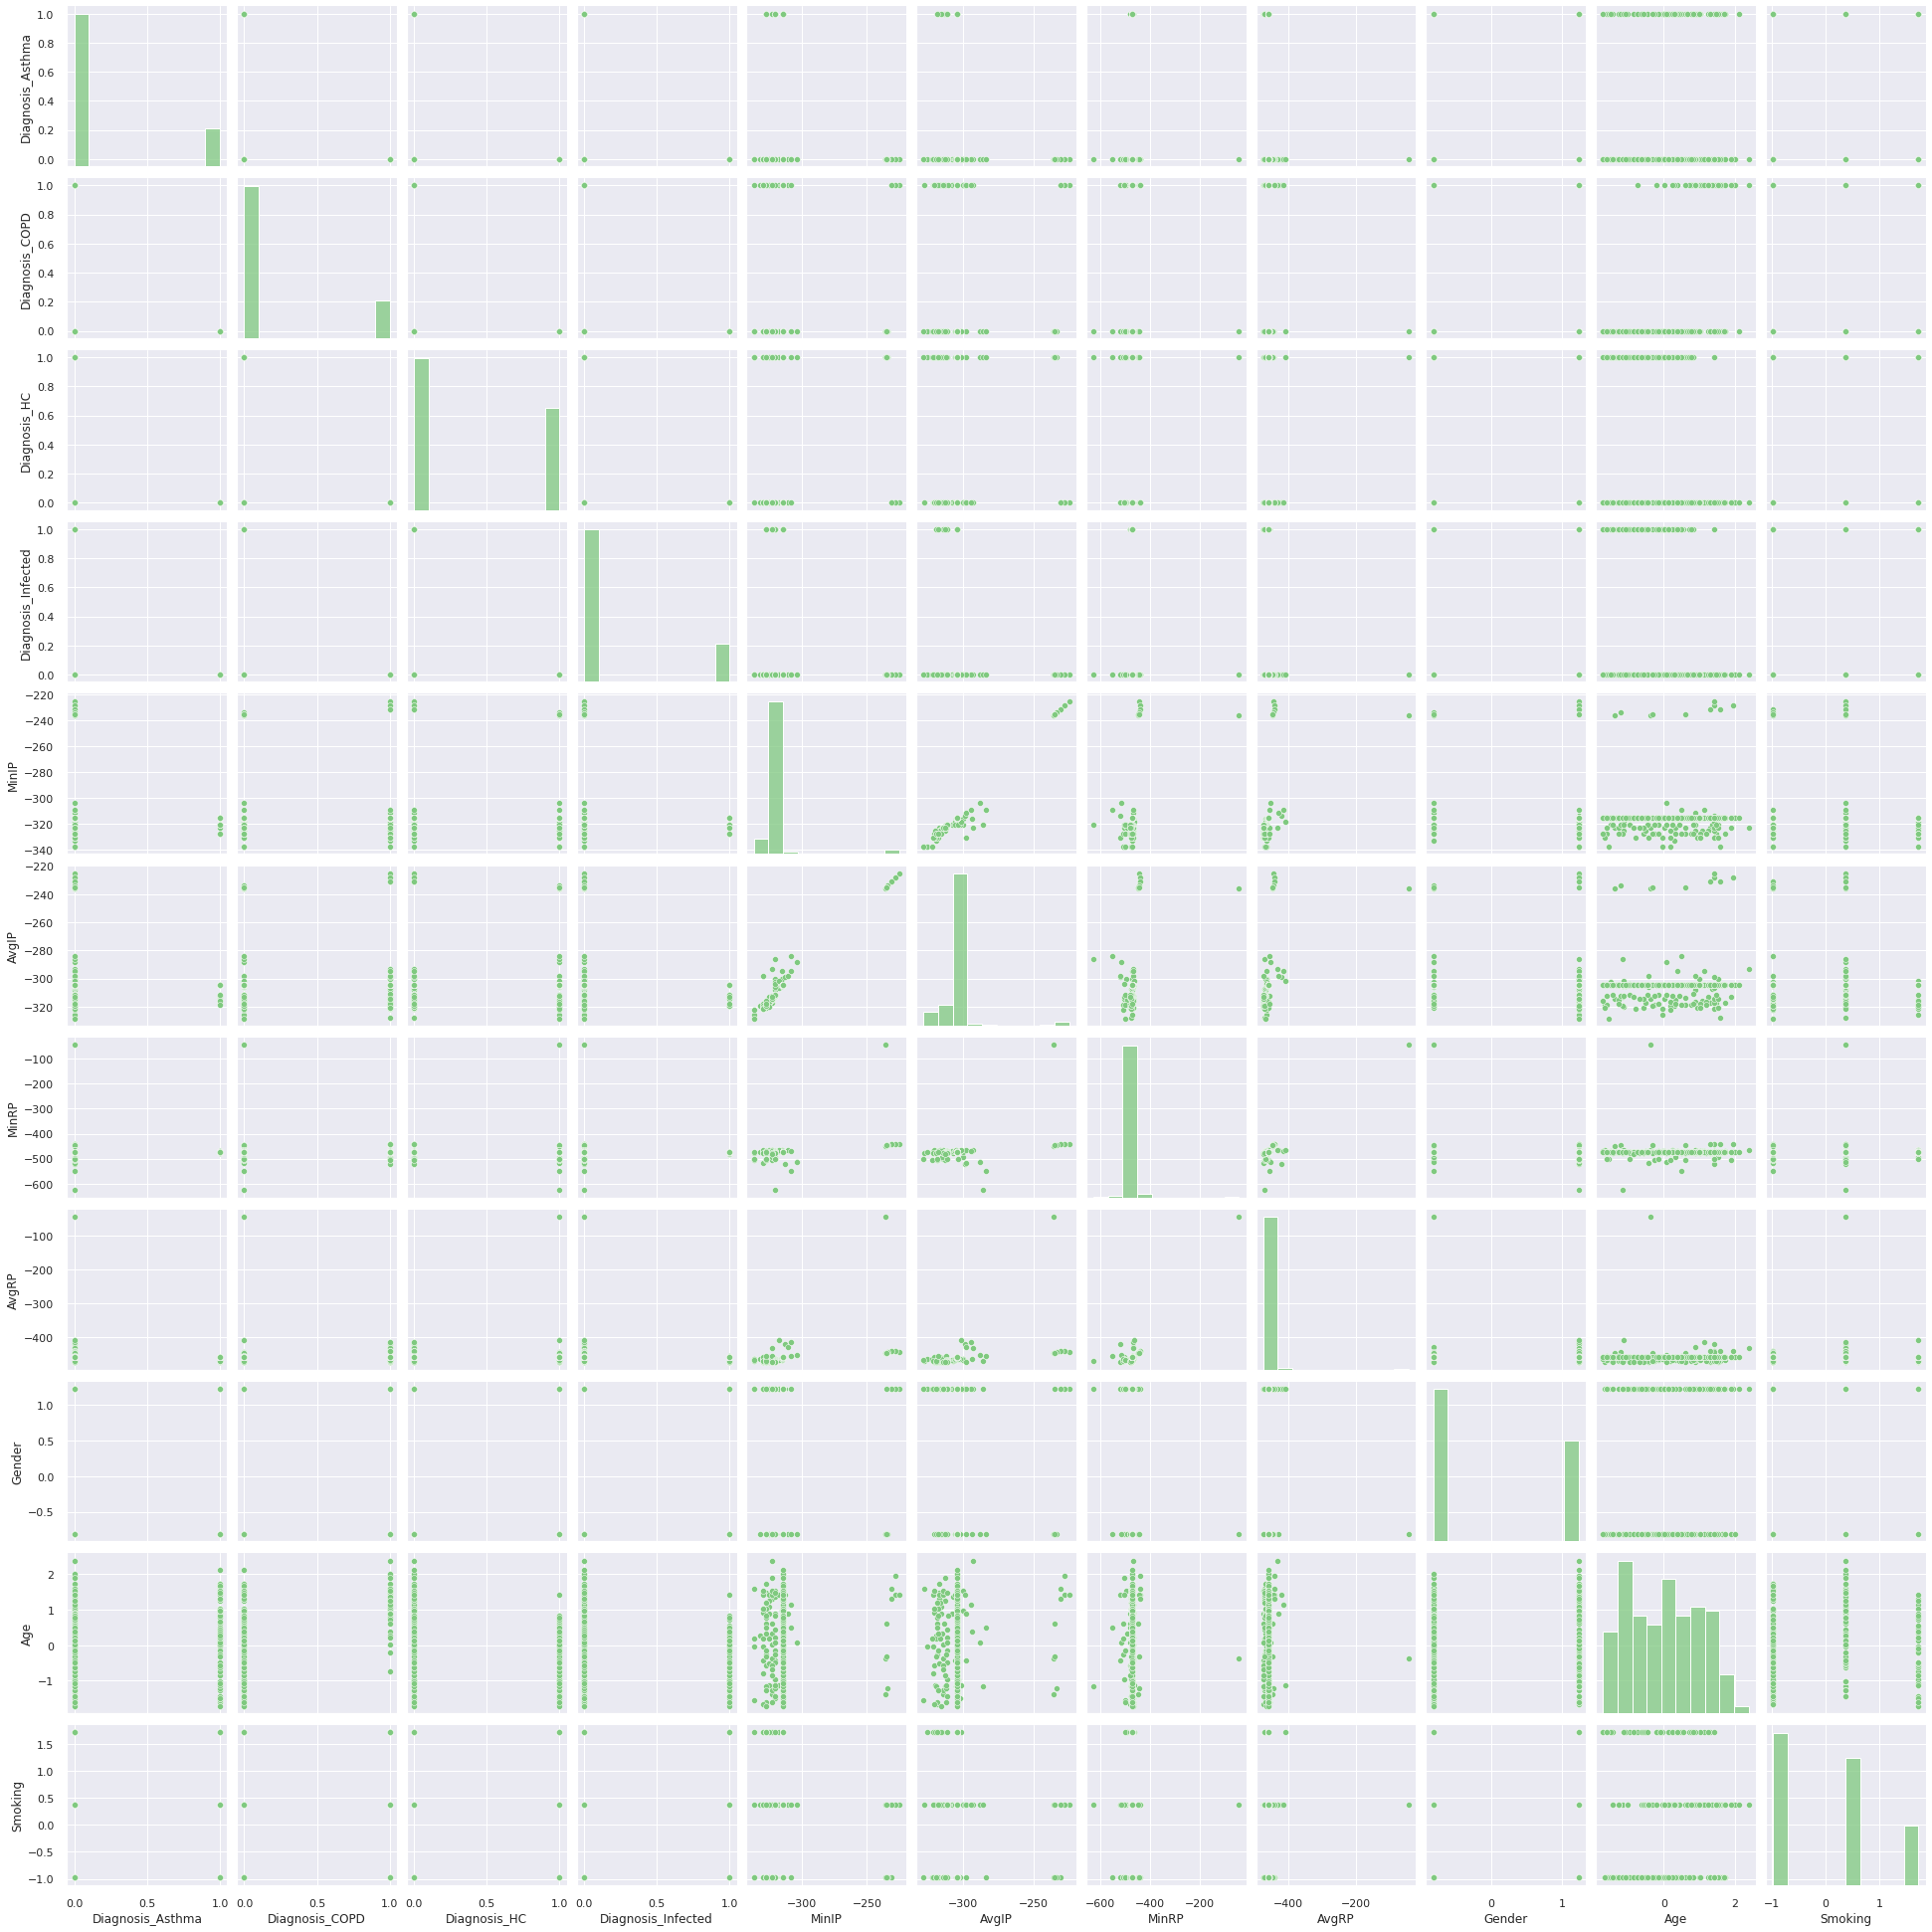

In [14]:
# Draw pair plot of scatter and histogram
sns.pairplot(data=df_exa_ready)

From the plot above we can see that there is clear cluster formed on the scatter plot between MinIP,AvgIP,MinRP,AvgRP,Age,Smoking.

## Feature Selection

From our previous result we can select those 6 column as our feature and exclude the gender column.

In [15]:
feature = df_exa_ready[['MinIP','AvgIP','MinRP','AvgRP' ,'Age', 'Smoking']]
feature.head()

,MinIP,AvgIP,MinRP,AvgRP,Age,Smoking
0,-320.61,-300.563531,-495.26,-464.171991,1.524140,0.368550
1,-325.39,-314.750360,-473.73,-469.263140,1.254506,0.368550
2,-323.00,-317.436056,-476.12,-471.897667,1.308433,1.717648
3,-327.78,-317.399670,-473.73,-468.856388,1.470213,0.368550
4,-325.39,-316.155785,-478.52,-472.869783,0.877019,0.368550


## K-Means Clustering


### Finding Optimal Number of Cluster


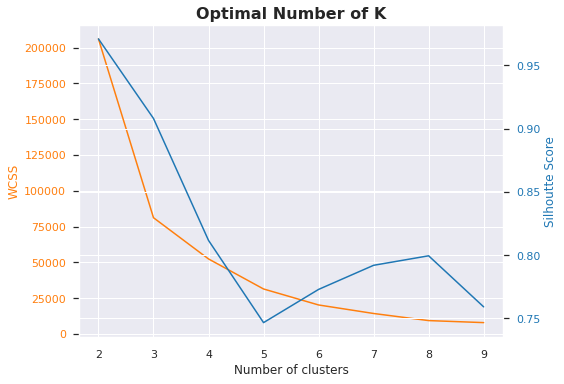

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics

# Elbow Method
k_range = [i for i in range (2, 10)]
wcss = []
silhouette = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=10, random_state=0)
    km_cluster = kmeans.fit_predict(feature)
    km_silhouette = metrics.silhouette_score(feature, km_cluster)

    wcss.append(kmeans.inertia_)
    silhouette.append(km_silhouette)
    # print(k, km_silhouette)
  
# Visualize 
## Initialize plot
fig, ax1 = plt.subplots()

## Draw wcss line
color1 = 'tab:orange'
ax1.set_title('Optimal Number of K', fontsize=16, fontweight='bold')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS', color=color1)
ax1.plot(k_range, wcss, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

##  instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

## Draw silhouette score line
color2 = 'tab:blue'
ax2.set_ylabel('Silhoutte Score', color=color2)
ax2.plot(k_range, silhouette, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()
plt.show()

### Building Model

From the above plot we can see that $k = 9$ get the best wcss score while also having a pretty good silhouette score so we will use it to build our model.

In [17]:
from sklearn import metrics

# Fit K-Means Model to the Data
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=500, n_init=10, random_state=0)
km_cluster = kmeans.fit_predict(feature)

# Evaluate model
km_silhouette = metrics.silhouette_score(feature, km_cluster)
print(km_silhouette)

0.7590327281327663


## Hierarchical Clustering


### Finding Optimal Number of Cluster


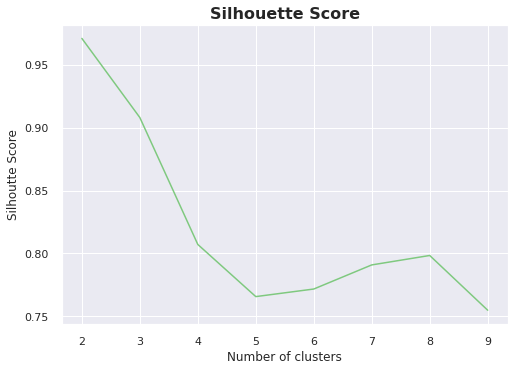

In [18]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

k_range = [i for i in range (2, 10)]
# wcss = []
silhouette = []
for k in k_range:
    hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    hc_cluster = hc.fit_predict(feature)
    hc_silhouette = metrics.silhouette_score(feature, hc_cluster)

    # wcss.append(kmeans.inertia_)
    silhouette.append(hc_silhouette)
    # print(k, hc_silhouette)
  
# Visualize 
plt.plot(k_range, silhouette)
plt.title('Silhouette Score', fontsize=16, fontweight='bold')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()

### Building Model

K = 9 as the optimal number of cluster with the Agglomerative Hierarchical algorithm, so let's build our model with 9 clusters.

In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Fit the Hierarchical Clustering Model to the Dataset
hc = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
hc_cluster = hc.fit_predict(feature)

# Evaluate model
hc_silhouette = metrics.silhouette_score(feature, hc_cluster)


## Model Comparison

Looking at the silhouette score of the best model from each algorithm we can see that they are about the same with K-Means having about 0.002 point higher than the hierarchical clustering.

In [20]:
print('Silhouette score of K-Means model:', km_silhouette)
print('Silhouette score of Agglomerative model:', hc_silhouette)

Silhouette score of K-Means model: 0.7590327281327663
Silhouette score of Agglomerative model: 0.7549049464783134


# Cluster Analysis

We will now try to visualize our cluster into a 3D plot to analyze the characteristic of each cluster.

In [21]:
print(set(km_cluster))

{0, 1, 2, 3, 4, 5, 6, 7, 8}


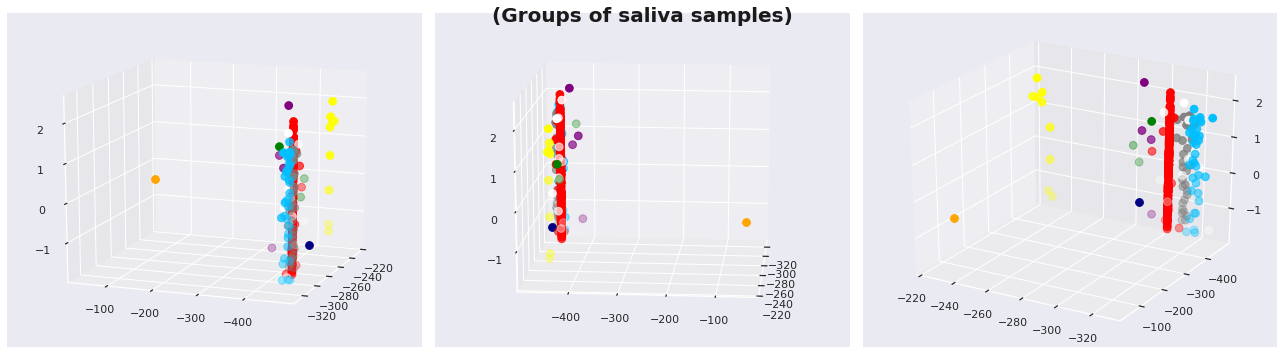

In [22]:
# Insert label into original data
feature['cluster'] = km_cluster

# Create figure
fig = plt.figure(figsize=(18,5))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# Define colors
colors = ['red', 'orange', 'yellow', 'green', 'deepskyblue', 'navy', 'purple' , 'white' , 'gray','gold']

axes = [ax1, ax2, ax3]
for ax in axes:
    # Iterate thorough each cluster
    for c in set(km_cluster):
        new_feature = feature[feature['cluster']==c]
        # plt.rcParams['axes.facecolor']='white
        #ax.scatter(new_feature['MinIP'], new_feature['AvgIP'], new_feature['MinRP'], new_feature['AvgRP'], new_feature['Age'], new_feature['Smoking'],c=colors[c], s=60)
        ax.scatter(new_feature['AvgIP'], new_feature['AvgRP'],  new_feature['Age'],c=colors[c], s=60)
        

ax1.view_init(elev=15, azim=-160)
ax2.view_init(elev=15, azim=5)
ax3.view_init(elev=25, azim=120)
fig.suptitle('(Groups of saliva samples)', fontsize=20, color='k', fontweight='bold')

fig.tight_layout()

The visualization result show that our model did a pretty good job at clustering the data. Below are a couple simpler 2D graph to better help us understand our result.

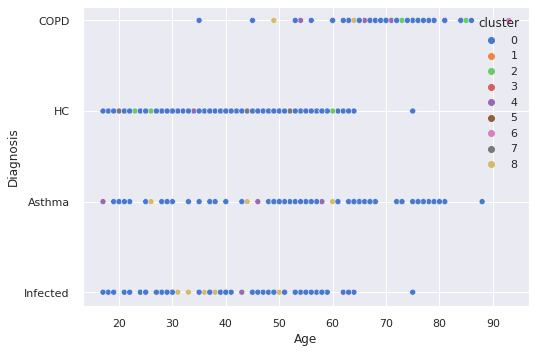

In [23]:
# Insert label into original data
df_exa['cluster'] = km_cluster
df_exa_ready['cluster'] = km_cluster
sns.scatterplot(data=df_exa, x='Age', y='Diagnosis', hue='cluster', palette='muted')

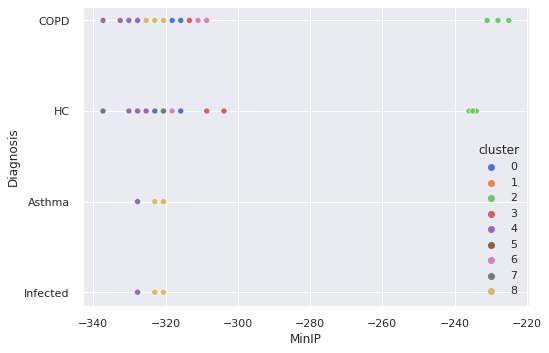

In [24]:
sns.scatterplot(data=df_exa, x='MinIP', y='Diagnosis', hue='cluster', palette='muted')

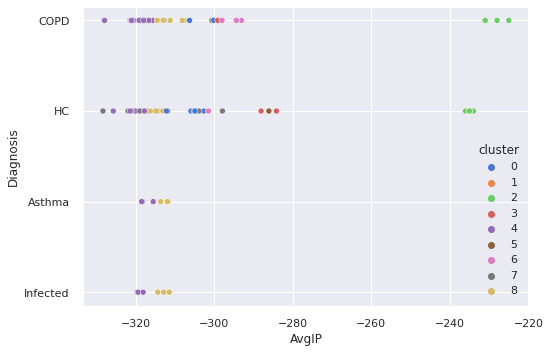

In [25]:
sns.scatterplot(data=df_exa, x='AvgIP', y='Diagnosis', hue='cluster', palette='muted')

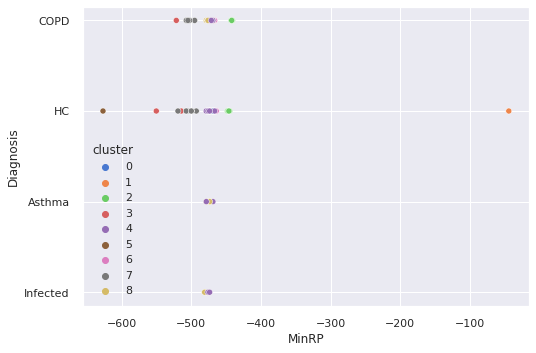

In [26]:
sns.scatterplot(data=df_exa, x='MinRP', y='Diagnosis', hue='cluster', palette='muted')

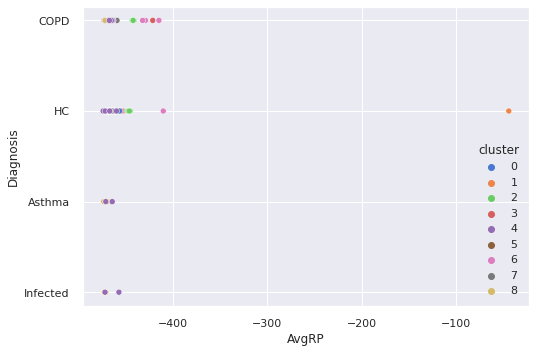

In [27]:
sns.scatterplot(data=df_exa, x='AvgRP', y='Diagnosis', hue='cluster', palette='muted')

# Output

## Saving Clustering Result

Last, we will save our new dataset which include the cluster label into a csv file for easier access in the future.

In [31]:
df_exa['MinIP'] = df_exa_ready['MinIP']
df_exa['AvgIP'] = df_exa_ready['AvgIP']
df_exa['MinRP'] = df_exa_ready['MinRP']
df_exa['AvgRP'] = df_exa_ready['AvgRP']

In [32]:
# Save new dataframe into csv file
df_exa.to_csv('exasens_segmentation.csv', index=False)

df_exa.head(5)

,Diagnosis,MinIP,AvgIP,MinRP,AvgRP,Gender,Age,Smoking,cluster
0,COPD,-320.61,-300.563531,-495.26,-464.171991,1,77,2,7
1,COPD,-325.39,-314.750360,-473.73,-469.263140,0,72,2,8
2,COPD,-323.00,-317.436056,-476.12,-471.897667,1,73,3,8
3,COPD,-327.78,-317.399670,-473.73,-468.856388,1,76,2,4
4,COPD,-325.39,-316.155785,-478.52,-472.869783,0,65,2,8


In [33]:
df_exa.isnull().sum()

Diagnosis    0
MinIP        0
AvgIP        0
MinRP        0
AvgRP        0
Gender       0
Age          0
Smoking      0
cluster      0
dtype: int64